In [442]:
using Revise, PtyLab, Parameters, Napari, EllipsisNotation, Colors, ImageShow, ImageCore, FFTW, BenchmarkTools

FFTW.set_num_threads(2)

In [2]:
experimentalData = ExperimentalDataCPM("../../fracpy/example_data/simu.hdf5");

┌ Info: Reading HDF5.File: (read-only) ../../fracpy/example_data/simu.hdf5 was successful
└ @ PtyLab /home/fxw/Documents/Uni/my_projects/Ptychography/PtyLab.jl/src/ExperimentalData.jl:55


In [3]:
reconstruction = ReconstructionCPM(experimentalData);

┌ Warning: Currently No = 4 * Np, just as guess, should be improved
└ @ PtyLab /home/fxw/Documents/Uni/my_projects/Ptychography/PtyLab.jl/src/utils_calc.jl:91


In [4]:
reconstruction = PtyLab.initializeObjectProbe!(reconstruction);

In [9]:
engine = PtyLab.ePIE()

ePIE{Float32}
  betaProbe: Float32 0.25f0
  betaObject: Float32 0.25f0
  numIterations: Int64 50


In [7]:
params2 = Params()

Params
  fftshiftSwitch: Bool false
  fftshiftFlag: Bool false
  FourierMaskSwitch: Bool false
  CPSCswitch: Bool false
  CPSCupsamplingFactor: Bool false
  intensityConstraint: PtyLab.IntensityConstraintStandard PtyLab.IntensityConstraintStandard()
  propagatorType: Fraunhofer (function of type typeof(Fraunhofer))
  momentumAcceleration: Bool false
  adaptiveMomentumAcceleration: Bool false
  positionOrder: PtyLab.GridRegularRand <: PtyLab.PositionOrder


In [55]:
reconstruction = PtyLab.initializeObjectProbe!(reconstruction);

┌ Warning: gimmel is currently estimated as `100 * eps(Float32)`
└ @ PtyLab /home/fxw/Documents/Uni/my_projects/Ptychography/PtyLab.jl/src/Engines.jl:35
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


 14.332177 seconds (13.68 M allocations: 4.907 GiB, 1.43% gc time, 0.88% compilation time)


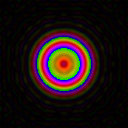

In [440]:
#engines.
params2.fftshiftFlag = true
reconstruction = PtyLab.initializeObjectProbe!(reconstruction);
engine.numIterations = 20
@time p, o = PtyLab.reconstruct(engine, params2, reconstruction);

complex_show(p[:, :, 1,1,1,1])

┌ Warning: gimmel is currently estimated as `100 * eps(Float32)`
└ @ PtyLab /home/fxw/Documents/Uni/my_projects/Ptychography/PtyLab.jl/src/Engines.jl:35
Progress: 100%|█████████████████████████████████████████| Time: 0:00:28


 28.252587 seconds (17.08 M allocations: 55.853 GiB, 3.26% gc time)


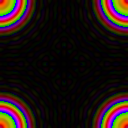

In [441]:
#engines.
params2.fftshiftFlag = false
reconstruction = PtyLab.initializeObjectProbe!(reconstruction);
engine.numIterations = 300
@time p, o = PtyLab.reconstruct(engine, params2, reconstruction);

complex_show(p[:, :, 1,1,1,1])

┌ Warning: gimmel is currently estimated as `100 * eps(Float32)`
└ @ PtyLab /home/fxw/Documents/Uni/my_projects/Ptychography/PtyLab.jl/src/Engines.jl:35
Progress: 100%|█████████████████████████████████████████| Time: 0:00:23


 23.770041 seconds (12.21 M allocations: 55.565 GiB, 3.64% gc time)


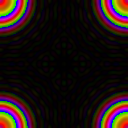

In [431]:
#engines.
params2.fftshiftFlag = false
reconstruction = PtyLab.initializeObjectProbe!(reconstruction);
engine.numIterations = 300
@time p, o = PtyLab.reconstruct(engine, params2, reconstruction);

complex_show(p[:, :, 1,1,1,1])